<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>


<span style="color : red">

ADEL MOVAHEDIAN<br>

</span>

---
# Finetuning CNN using regression loss

- CNN are proven to be a better model of visual cortex, but the goal of visual cortex is not limited to image classification.

- Typically, to model visual cortex responses using CNNs, we -

  1. Extract features of intermediate layers
  2. Reduce dimensionality of the data using techniques like PCA
  3. Perform regression to predict neural data.

- This approach fails to predict all the variance in the data.

**A better approach is to train CNNs directly on the neural response.**

- CNNs are built to somehow mimic the functionality of the visual system. They are able to achieve a high performance on many tasks, that were previously believed to be impossible for machines to solve. We are going to explore them in this assignment.

    1. Explain about the visual system, focusing on the data flow (You should explain the pathways in the visual system).

    2. What does each part of the visual system reveal about the stimuli (You should explain about the features that each part detects, like lines, angles, ...)?

    3. Compare the CNNs with the visual system. How are they alike and in which parts, do they converge?

    4. Explain about different learning strategies that we can deploy on the neural networks. What learning strategies have neurological evidence? 

<span style="color: green;">

<span style="color: lightblue;">

### 1. Explain the Visual System, Focusing on Data Flow 

</span>

The visual system processes visual information through a series of steps:

1. **Retina**: Light enters the eye and hits the retina. Here, photoreceptor cells (rods and cones) convert light into electrical signals.
2. **Optic Nerve**: These signals are passed to retinal ganglion cells, whose axons form the optic nerve.
3. **Optic Chiasm**: The optic nerves partially cross at the optic chiasm, so each hemisphere of the brain processes information from the opposite visual field.
4. **Lateral Geniculate Nucleus (LGN)**: The optic nerves project to the LGN in the thalamus, which organizes and relays visual information to the cortex.
5. **Primary Visual Cortex (V1)**: The LGN sends information to V1 in the occipital lobe. V1 processes basic visual features like edges and motion.
6. **Higher Visual Areas**: Information flows from V1 to higher areas (V2, V3, V4, MT) in the occipital and temporal lobes. These areas handle more complex visual aspects like color, depth, and object recognition.

<span style="color: lightblue;">

### 2. What Each Part of the Visual System Reveals About Stimuli

</span>

- **Retina**: Detects light intensity and color. Rods are sensitive to low light and motion; cones detect color and fine details.
- **Optic Nerve and Optic Chiasm**: Transmit visual information, ensuring each brain hemisphere processes the opposite visual field.
- **Lateral Geniculate Nucleus (LGN)**: Processes brightness, contrast, and color.
- **Primary Visual Cortex (V1)**: Detects edges, orientations, and motion direction.
- **Higher Visual Areas (V2, V3, V4, MT)**:
  - **V2**: Handles complex shapes and depth perception.
  - **V3**: Processes motion and global visual field aspects.
  - **V4**: Specializes in color and form.
  - **MT**: Focuses on motion detection.


<span style="color: lightblue;">

### 3. Compare CNNs with the Visual System

</span>

Convolutional Neural Networks (CNNs) and the visual system share similarities:

- **Hierarchical Processing**: Both process information in layers, from simple to complex features.
  - In CNNs, initial layers detect edges and textures; later layers recognize objects.
  - In the visual system, V1 detects edges; higher areas recognize complex forms.
- **Feature Detection**: Early layers in CNNs and the visual system detect basic features (for example edges), while higher layers/areas detect complex structures (for example shapes, objects).
- **Local Receptive Fields**: In both systems, cells (or neurons) respond to specific regions of the input, allowing detailed local feature detection.
- **Pooling Mechanisms**: CNNs use pooling to reduce data size and highlight dominant features, similar to how the visual system integrates information for abstraction.

<span style="color: lightblue;">

### 4. Learning Strategies for Neural Networks and Their Neurological Evidence

</span>

- **Supervised Learning**: The model learns from labeled data by comparing predictions to actual labels and adjusting accordingly. This mirrors how humans learn from instruction and feedback.
- **Unsupervised Learning**: The model finds patterns in unlabeled data, similar to how humans learn by observing and exploring.
- **Reinforcement Learning**: The model learns by interacting with an environment and receiving rewards or penalties, akin to human learning through trial and error.
- **Transfer Learning**: A model trained on one task is fine-tuned for a related task, much like how humans apply knowledge from one area to another.

**Neurological Evidence**:

- **Hebbian Learning**: "Cells that fire together wire together" - when neurons activate together, their connections strengthen, reflecting how synaptic plasticity works in the brain.
- **Error Backpropagation**: While not directly observed in the brain, adjusting synaptic weights based on error signals has similarities to how the brain refines learning through neurotransmitter activity.
- **Reinforcement Learning**: The brain's dopamine system is involved in reward-based learning, similar to reinforcement learning algorithms, where dopamine signals guide learning and decision-making.
like what we had in the slides.
</span>

---
# Setup

We are now exploring some simple tasks using pytorch.


- We are going to use the following package : torch_intermediate_layer_getter.
Search What it does and why we do that ?
############## TO DO ###############

<span style="color : green;">

It allows us to capture and return the outputs of specified layers within a neural network during the forward pass. This is typically done by wrapping the original model and registering hooks on the desired layers to store their outputs.

**the reasons** <br> 
**1.Understanding Model Behavior**: Helps to see how the model processes data at different stages.<br>
**2.Debugging**: Identifies where errors may occur by examining intermediate outputs.<br>
**3.Feature Extraction**: Uses intermediate outputs as features for other tasks or models, useful in transfer learning.<br>
**4.Visualization**: Visualizes activations to interpret the model’s workings.<br>
**5.Layer-wise Training**: Assists in techniques that require accessing specific layers for training or fine-tuning.
</span>

In [5]:
# @title Install dependencies
!pip install Pillow --quiet
!pip install torch_intermediate_layer_getter --quiet

In [80]:
#  Imports
import copy

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
from torch import nn, optim
from torch.utils.data import Dataset
from torch_intermediate_layer_getter import IntermediateLayerGetter as MidGetter

from torchvision import transforms
import torchvision.models as models


from scipy.spatial.distance import pdist
from scipy.stats import pearsonr

# Add more if you need

next cell download and extract data, for better understanding task search about dataset properties and write down results below:
############## TO DO ###############

<span style="color :green">

### Dataset Properties

#### Overview
- **Name**: Kay dataset.
- **Type**: Image dataset with corresponding labels.
- **Purpose**: Used for training, validation, and testing in visual recognition tasks.

#### Composition
- **Images**: Stored in `.npz` file, likely resized to 224x224 pixels, with RGB channels.
- **Labels**: Stored in `.npy` files, with categories corresponding to each image.

#### Structure
- **Files**: 
  - Images in `kay_images.npz`.
  - Training labels in `kay_labels.npy`.
  - Validation labels in `kay_labels_val.npy`.
- **Organization**: Loaded into dictionaries, with splits for 'train' and 'val'.

#### Preprocessing
- **Normalization**: Images normalized to a specific range for consistency.
- **Resizing**: Uniform image size for model input.
- **Augmentation**: Applied to training data for diversity (e.g., random cropping, flipping).

The Kay dataset is structured to facilitate effective model training and validation, with images and labels organized and preprocessed to ensure consistency and improve model performance.

</span>

In [81]:
# @title Downloading Kay dataset
import requests

fnames = ["kay_labels.npy", "kay_labels_val.npy", "kay_images.npz"]

urls =['https://osf.io/r638s/download',
       'https://osf.io/yqb3e/download',
       'https://osf.io/ymnjv/download']

for i, url in enumerate(urls):
  r = requests.get(url, allow_redirects=True)
  with open(fnames[i], 'wb') as fh:
    fh.write(r.content)


with np.load(fnames[2]) as dobj:
  dat = dict(**dobj)
labels = np.load('kay_labels.npy')
val_labels = np.load('kay_labels_val.npy')

It is always a good idea to look at the data we are dealing with. Visualize some samples and plot them below.

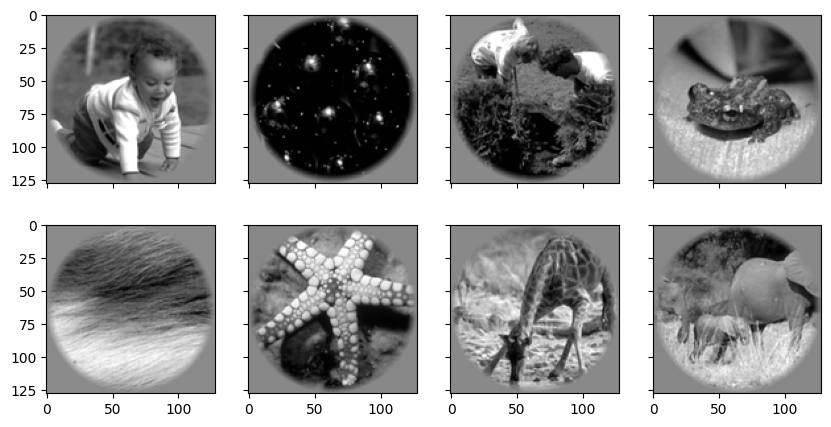

In [82]:
# @title Visualizing example images
############## TO DO ###############
fig, axs = plt.subplots(2, 4, figsize=(10,5), sharex=True, sharey=True)
for ax, imagee in zip(axs.flat, dat["stimuli"]):
    ax.imshow(imagee, cmap="gray")
plt.show()


---
# Dataset Structure

While using the neural networks, we have to be careful about the dimensions and the stimuli we are feeding the network with.

`dat` has the following fields:  
- `stimuli`: stim $x_i \, \, x_j$ array of grayscale stimulus images
- `stimuli_test`: stim $x_i \, \, x_j$ array of grayscale stimulus images in the test set  
- `responses`: stim $x$ voxel array of $z$-scored BOLD response amplitude
- `responses_test`:  stim $x$ voxel array of $z$-scored BOLD response amplitude in the test set  
- `roi`: array of voxel labels
- `roi_names`: array of names corresponding to voxel labels

Based of Letcures, describe roi and roi_names and match with the dataset?
############## TO DO ###############

<span style="color : green">

Regions of Interest (ROIs) are specific areas within the brain that researchers focus on to understand neural activity related to particular tasks or stimuli. ROIs are crucial in neuroscience research because they allow for targeted analysis of brain function, often relating to perception, cognition, or motor activity.

ROI Names typically refer to specific brain regions identified either anatomically or functionally. For example, common ROIs in visual studies might include the primary visual cortex (V1), visual area V2, and higher visual areas like V4 and IT (inferotemporal cortex). These regions are known to process visual information at different levels of complexity.

**Matching ROIs with the Dataset**

To match ROIs and ROI names with dataset, typically, the dataset will include:

Images: The visual stimuli presented during the experiment.
ROI Data: Neural responses recorded from different ROIs.
ROI Names: Labels corresponding to the recorded ROIs.
and we have correlated parts in our dataset
</span>

In [58]:
print(dat["roi"])
print(dat["roi_names"])

[3 3 3 ... 3 3 6]
['Other' 'V1' 'V2' 'V3' 'V3A' 'V3B' 'V4' 'LatOcc']


In [83]:
# Converting stimulus to RGB and changing the scale to 0-255 (Specific to Kay dataset images)
stimuli_tr = dat["stimuli"]
stimuli_ts = dat["stimuli_test"]
stimuli_tr_c = np.zeros((1750, 3, 128, 128))
stimuli_ts_c = np.zeros((120, 3, 128, 128))
############## TO DO ###############
for i in range(1750):
  img = stimuli_tr[i, :, :]
  img = ((img - np.min(img))*255/(np.max(img) - np.min(img)))
  img = img.astype(int)
  stimuli_tr_c[i, :, :, :] = [img,img,img]

for i in range(120):
  img = stimuli_ts[i, :, :]
  img = ((img - np.min(img))*255/(np.max(img) - np.min(img)))
  img = img.astype(int)
  stimuli_ts_c[i, :, :, :] = [img, img, img]

---
# Fine Tuning AlexNet on voxel activations





It is previously demonstrated that simple features are extracted in the early layers of the neural network, so it is a good idea to use pre-trained nets which are trained on enormous data sets and just modify the final layers.

1- Search about fine tuning. Why do we fine tune in the first place?

<span style="color:green">


**Fine-tuning** is a technique in transfer learning where a pre-trained neural network (usually on a large dataset like ImageNet) is further trained on a new, often smaller dataset. This process involves adjusting the weights of the pre-trained network to adapt it to the new dataset.

**Reasons for Fine-Tuning**:
- **Leverage Pre-trained Knowledge**: Pre-trained networks have already learned useful feature representations from large datasets, which can be transferred to new tasks.
- **Improve Performance**: Fine-tuning can significantly improve the performance on the target dataset by adapting the pre-trained model to the specific characteristics of the new data.
- **Reduce Training Time**: Starting with a pre-trained model often leads to faster convergence compared to training from scratch, as the model starts with weights that are already tuned to recognize useful features.
- **Overcome Limited Data**: Fine-tuning is particularly beneficial when the new dataset is small, as training a deep network from scratch on a small dataset can lead to overfitting.

</span>
2- Search about different situations where fine tuning is done.


<span style="color:green">

Fine-tuning is commonly used in various scenarios, including but not limited to:

- **Domain Adaptation**: When the new dataset is from a different domain but related to the domain of the pre-trained model. For example, fine-tuning a model pre-trained on natural images for medical imaging tasks.
- **Specialized Tasks**: When the new task is specialized and the pre-trained model needs to be adapted. For instance, adapting a general image recognition model for specific tasks like identifying plant diseases.
- **Limited Data**: When the new dataset is small, fine-tuning helps to use the knowledge from a larger dataset to prevent overfitting.
- **Specific Classes**: When the new task involves a different set of classes. For example, fine-tuning a model pre-trained on ImageNet to classify different species of animals.

</span>

3- Name the different layers that are present in AlexNet. Briefly explain each layer's role. On what layers do we perform fine tuning>

<span style="color:green">

AlexNet is a well-known deep convolutional neural network architecture. Here are the main layers in AlexNet and their roles:

1. **Input Layer**:
   - **Role**: Takes the input image of size 227x227x3.

2. **Conv1 (Convolutional Layer 1)**:
   - **Role**: Applies 96 filters of size 11x11 with a stride of 4, followed by ReLU activation. This layer captures low-level features like edges and textures.

3. **Max Pooling Layer 1**:
   - **Role**: Reduces the spatial dimensions using max pooling with a 3x3 filter and a stride of 2.

4. **Conv2 (Convolutional Layer 2)**:
   - **Role**: Applies 256 filters of size 5x5, followed by ReLU activation. This layer captures more complex patterns.

5. **Max Pooling Layer 2**:
   - **Role**: Further reduces the spatial dimensions using max pooling with a 3x3 filter and a stride of 2.

6. **Conv3 (Convolutional Layer 3)**:
   - **Role**: Applies 384 filters of size 3x3, followed by ReLU activation. This layer captures higher-level features.

7. **Conv4 (Convolutional Layer 4)**:
   - **Role**: Applies 384 filters of size 3x3, followed by ReLU activation.

8. **Conv5 (Convolutional Layer 5)**:
   - **Role**: Applies 256 filters of size 3x3, followed by ReLU activation.

9. **Max Pooling Layer 3**:
   - **Role**: Further reduces the spatial dimensions using max pooling with a 3x3 filter and a stride of 2.

10. **Fully Connected Layer 1**:
    - **Role**: Applies 4096 neurons followed by ReLU activation. This layer learns high-level representations.

11. **Fully Connected Layer 2**:
    - **Role**: Applies 4096 neurons followed by ReLU activation.

12. **Fully Connected Layer 3**:
    - **Role**: Applies 1000 neurons (for ImageNet classification), followed by a softmax activation to output probabilities for each class.

#### Layers for Fine-Tuning:
- **Earlier Layers (Conv1 to Conv5)**: These layers learn low-level to mid-level features. In many cases, these are kept frozen (not updated) during fine-tuning to retain the general feature extraction capabilities.
- **Later Layers (Fully Connected Layers)**: These layers are often fine-tuned to adapt the pre-trained model to the specific task of the new dataset. The final fully connected layer, in particular, is usually replaced with a new layer that matches the number of classes in the new dataset and is trained from scratch.

</span>

In [84]:
# @title Setting up training and test data for LOC region (roc = 7)
############## TO DO ###############
loc_id = np.where(dat['roi'] == 7)
response_tr = np.squeeze(dat["responses"][:, loc_id])
response_ts = np.squeeze(dat["responses_test"][:, loc_id])

When and Why we use transform function for dataset.
############## TO DO ###############

<span style="color:green ">
so in general we have to question to answer:<br>

#### When to Use Transform Functions? ####

Transform functions are used when preparing datasets for training machine learning models, particularly deep learning models. They are applied in several contexts:

1. **Data Augmentation**: To artificially increase the size and variability of the training dataset.
2. **Normalization**: To scale pixel values or other feature values to a consistent range.
3. **Data Preprocessing**: To convert data into a suitable format for the model (e.g., converting images to tensors).
4. **Data Cleaning**: To remove noise or artifacts from the data.
5. **Feature Extraction**: To extract relevant features from raw data.
6. **Batch Processing**: When loading data in batches during training.

#### Why We Use Transform Functions? ####

1. **Data Augmentation**:
   - **Purpose**: To prevent Overfitting and improve the generalization of the model.
   - **Example**: Applying random rotations, flips, or crops to images.
   - **Benefit**: Helps the model learn to recognize objects in different orientations and positions.

2. **Normalization**:
   - **Purpose**: To ensure that the feature values are within a consistent range, typically [0, 1] or [-1, 1].
   - **Example**: Scaling pixel values from [0, 255] to [0, 1].
   - **Benefit**: Improves the convergence rate of the optimization algorithm and ensures that gradients are well-scaled.

3. **Data Preprocessing**:
   - **Purpose**: To convert raw data into a format that can be fed into the model.
   - **Example**: Converting images to PyTorch tensors.
   - **Benefit**: Ensures compatibility with the model’s input requirements.

4. **Data Cleaning**:
   - **Purpose**: To remove or reduce noise and artifacts in the data.
   - **Example**: Applying smoothing filters to images.
   - **Benefit**: Improves the quality of the data and, consequently, the model’s performance.

5. **Feature Extraction**:
   - **Purpose**: To derive meaningful features from raw data.
   - **Example**: Extracting edges from images using Sobel filters.
   - **Benefit**: Enhances the model’s ability to learn relevant patterns.

6. **Batch Processing**:
   - **Purpose**: To efficiently load and process data in batches during training.
   - **Example**: Applying transforms to batches of images.
   - **Benefit**: Reduces memory usage and speeds up training.

</span>

In [85]:
# @title Custom dataloader for loading images in numpy array
# use MyDatast or use your own dataloader.
class MyDataset(Dataset):
  def __init__(self, data, targets, transform=None):
    self.data = data
    # Convert the list of targets to a single NumPy array
    targets_array = np.array(targets)
    # Convert the NumPy array to a tensor   (for increasing speed i convert the list to a single numpy.ndarray with numpy.array() before converting to a tensor.
    self.targets = torch.from_numpy(targets_array).long()
    self.transform = transform

  def __getitem__(self, index):
    x = self.data[index]
    y = self.targets[index]

    if self.transform:
        x = Image.fromarray(self.data[index].astype(np.uint8).transpose(1, 2, 0))
        x = self.transform(x)

    return x, y

  def __len__(self):
      return len(self.data)

############## TO DO ###############
# complete transforms
transform = {
    'train': transforms.Compose([
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],
                                                      [0.229, 0.224, 0.225])
                                ]),
    'val': transforms.Compose([
                              transforms.Resize(256),
                              transforms.CenterCrop(224),
                              transforms.ToTensor(),
                              transforms.Normalize([0.485, 0.456, 0.406],
                                                    [0.229, 0.224, 0.225])
                              ]),
            }

dataset = {}
dataset['train'] = MyDataset(list(stimuli_tr_c),
                             list(response_tr),transform=transform['train'])
dataset['val'] = MyDataset(list(stimuli_ts_c),
                           list(response_ts), transform=transform['val'])
dataset_sizes = {x: len(dataset[x]) for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(dataset[x], batch_size=50) for x in ['train', 'val']}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [86]:
# Training on pretrained alexnet and find best wieghts on epochs,
#finally load best weights
############## TO DO ###############
net = models.alexnet(pretrained=True)
num_ftrs = net.classifier[6].in_features
net.classifier[6] = nn.Linear(num_ftrs, np.shape(response_ts)[1])
net.to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

best_model_weights = copy.deepcopy(net.state_dict())
best_loss = 10.0

for epoch in range(5):
	print(f"Epoch {epoch}/{4}")
	print('--------------------')
	for phase in ['train', 'val']:
		if phase == 'train':
			net.train()  
		else:
			net.eval()   
		running_loss = 0.00
		running_corrects = 0
		for inputs, labels in dataloaders[phase]:
			inputs = inputs.to(device)
			labels = labels.to(device)
			optimizer.zero_grad()
			with torch.set_grad_enabled(phase == 'train'):
				outputs = net(inputs)
				loss = criterion(outputs.type(torch.float32), labels.type(torch.float32))
				if phase == 'train':
					loss.backward(torch.ones_like(loss))
					optimizer.step()
			running_loss += loss.item() * inputs.size(0)
		epoch_loss = running_loss / dataset_sizes[phase]
		print(f"{phase} Loss: {epoch_loss:.4f}")
		if phase == 'val' and epoch_loss < best_loss:
			best_loss = epoch_loss
			best_model_weights = net.state_dict().copy()
	print()

# load best model weights
net.load_state_dict(best_model_weights)

Epoch 0/4
--------------------
train Loss: 0.4808
val Loss: 0.0500

Epoch 1/4
--------------------
train Loss: 0.4680
val Loss: 0.0500

Epoch 2/4
--------------------
train Loss: 0.4678
val Loss: 0.0499

Epoch 3/4
--------------------
train Loss: 0.4677
val Loss: 0.0499

Epoch 4/4
--------------------
train Loss: 0.4677
val Loss: 0.0499



<All keys matched successfully>

why we extract intermediate layers freatures ?
############## TO DO ###############

<span style = "color:green">


Extracting features from intermediate layers of a neural network, especially in convolutional neural networks (CNNs) like AlexNet, is a common practice in various applications:

1. **Hierarchical Feature Representation**:
   - **Early Layers**: Capture low-level features such as edges, textures, and simple patterns.
   - **Intermediate Layers**: Capture more complex patterns and structures, like shapes and parts of objects.
   - **Later Layers**: Capture high-level, abstract features that are more task-specific, like entire objects or semantic concepts.

2. **Transfer Learning**:
   - Pre-trained networks on large datasets (e.g., ImageNet) have learned useful features that can be transferred to other tasks. By extracting intermediate features, you can leverage these pre-trained representations for your specific task without retraining the entire network.

3. **Feature Visualization and Understanding**:
   - Extracting and visualizing intermediate features can help in understanding what the network is learning at different stages, which is crucial for debugging and improving the model.

4. **Dimensionality Reduction**:
   - Intermediate features often provide a more compact and informative representation of the input data compared to raw pixels. This can be useful for tasks like clustering, retrieval, or further processing in another model.

5. **Improving Performance on Downstream Tasks**:
   - Using intermediate features can enhance performance in tasks such as object detection, segmentation, or any other application that benefits from rich, multi-level feature representations.

6. **Feature Engineering**:
   - For certain applications, hand-crafted features might be less effective than features automatically learned by deep networks. Intermediate features can serve as powerful inputs for traditional machine learning algorithms.


</span>

In [71]:
## Extract features of all the intermediate layers from ImageNet-trained and finetuned Alexnet
return_layers = {
    'features.2': 'conv1',
    'features.5': 'conv2',
    'features.7': 'conv3',
    'features.9': 'conv4',
    'features.12': 'conv5',
    'classifier.1': 'fc1',
    'classifier.4': 'fc2',
    'classifier.6': 'fc3',
    }

# Loading AlexNet pretrained on Imagenet
############## TO DO ###############
net_imagee = models.alexnet(pretrained=True)
net_imagee.eval()
net_imagee.to(device)

# Setting up feature extraction step
############## TO DO ###############
midfeat_fine_tunes = MidGetter(net, return_layers=return_layers, keep_output=True)
midfeat_imagenet = MidGetter(net_imagee, return_layers=return_layers, keep_output=True)

# Loading validation data and forward pass through the network
############## TO DO ###############
dataloaders = {x: torch.utils.data.DataLoader(dataset[x], batch_size=120) for x in ['val']}
for inputs, labels in dataloaders['val']:
  inputs = inputs.to(device)
  mid_outputs_fine_tunes, _ = midfeat_fine_tunes(inputs)
  mid_outputs_imagenet, _ = midfeat_imagenet(inputs)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [87]:
# @title Dissimilarity - Correlation
# Loading V1 (roi = 1) and LOC (roi = 7) responses
############## TO DO ###############
v1_id = np.where(dat['roi'] == 1)
loc_id = np.where(dat['roi'] == 7)
Respond_ts_v1 = np.squeeze(dat["responses_test"][:, v1_id])
Respond_ts_lo = np.squeeze(dat["responses_test"][:, loc_id])
# Observed dissimilarity  - Correlation
############## TO DO ###############
ft = "euclidean"  # ['correlation', 'euclidean']
im = "correlation"  # ['correlation', 'euclidean']

Alexnet_ft_dist_metric = "euclidean"  # ['correlation', 'euclidean']
Alexnet_im_dist_metric = "correlation"  # ['correlation', 'euclidean']

dobs_v1_ft = pdist(Respond_ts_v1, ft)
dobs_lo_ft = pdist(Respond_ts_lo, ft)
dobs_v1_im = pdist(Respond_ts_v1, im)
dobs_lo_im = pdist(Respond_ts_lo, im)

# Comparing representation of V1 and LOC across different layers of Alexnet
############## TO DO ###############
r, p = np.zeros((4, 8)), np.zeros((4, 8))
for i,l in enumerate(mid_outputs_fine_tunes.keys()):
  dnet_ft = pdist(torch.flatten(mid_outputs_fine_tunes[l], 1, -1).cpu().detach().numpy(),
                  Alexnet_ft_dist_metric)
  dnet_im = pdist(torch.flatten(mid_outputs_imagenet[l], 1, -1).cpu().detach().numpy(),
                  Alexnet_im_dist_metric)
  r[0, i], p[0, i] = pearsonr(dnet_ft, dobs_v1_ft)
  r[1, i], p[1, i] = pearsonr(dnet_im, dobs_v1_im)
  r[2, i], p[2, i] = pearsonr(dnet_ft, dobs_lo_ft)
  r[3, i], p[3, i] = pearsonr(dnet_im, dobs_lo_im)

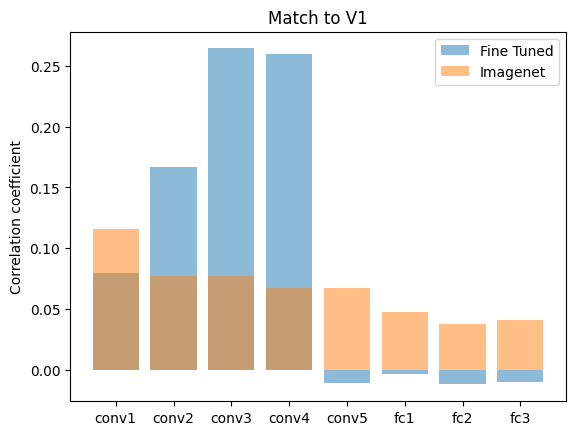

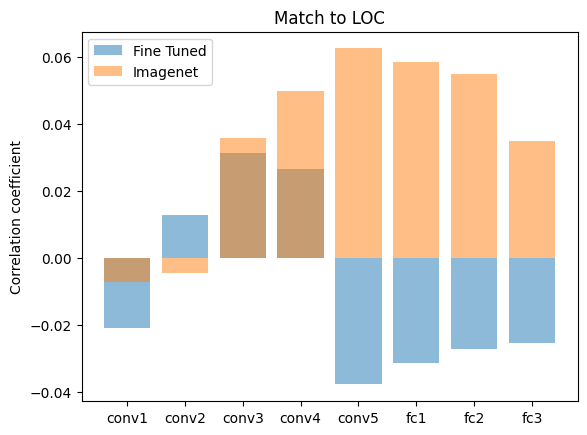

In [88]:
# @title Plotting correlation between observed and predicted dissimilarity values
############## TO DO ###############
plt.bar(range(8), r[0, :], alpha=0.5)
plt.bar(range(8), r[1, :], alpha=0.5)
plt.legend(['Fine Tuned', 'Imagenet'])
plt.ylabel('Correlation coefficient')
plt.title('Match to V1')
plt.xticks(range(8), mid_outputs_fine_tunes.keys())
plt.show()

plt.figure()
plt.bar(range(8), r[2, :], alpha=0.5)
plt.bar(range(8), r[3, :], alpha=0.5)
plt.legend(['Fine Tuned', 'Imagenet'])
plt.ylabel('Correlation coefficient')
plt.title('Match to LOC')
plt.xticks(range(8), mid_outputs_fine_tunes.keys())
plt.show()

**Describle Results in details :**

<span style="color:green">

Fine-tuning might be more suitable for tasks associated with V1 because fine-tuning allows the model to adapt and specialize in detecting specific features or patterns relevant to the new dataset. Since V1 deals with fundamental visual processing, fine-tuning can help refine the model to become more sensitive to the specific features present in the new dataset
 A model pre-trained on ImageNet might be more effective for tasks related to LOC because ImageNet-trained models are already adept at recognizing a wide variety of objects and shapes. The general features learned from the extensive and diverse ImageNet dataset align well with the higher-level object recognition tasks associated with LOC.

 <span>